<a href="https://colab.research.google.com/github/costpetrides/FAIRMODE-WG5/blob/main/dif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 56.5 MB/s eta 0:00:00


# $NO_{2}$

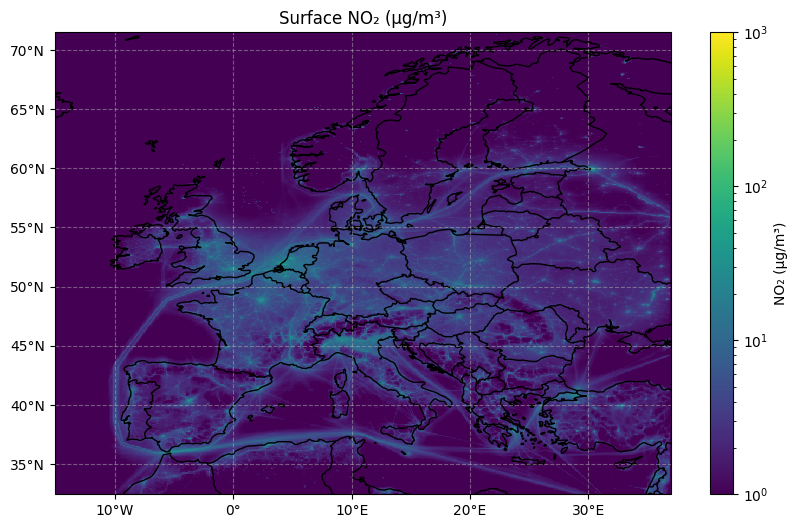

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors

# Load NetCDF file
base_case = xr.open_dataset("BaseCase_PERT_NO2_YEARLY.nc")

# Select the variable and first (or only) time step
variable_name = "SURF_ug_NO2"
data = base_case[variable_name].isel(time=0)  # Select first time step

# Mask zeros or set a small minimum value to avoid LogNorm issues
data = data.where(data > 0, 1e-10)  # Replace zeros with a small value to avoid log issues

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={"projection": ccrs.PlateCarree()})

# Apply logarithmic normalization (avoiding zero issues)
norm = mcolors.LogNorm(vmin=1, vmax=1000)  # Set vmin and vmax for the log scale

# Plot the data with log scaling
pcm = ax.pcolormesh(data.lon, data.lat, data, cmap="viridis", shading="auto",
                    norm=norm, transform=ccrs.PlateCarree())

# Add country borders and coastlines
ax.add_feature(cfeature.BORDERS, linewidth=1, edgecolor="black")
ax.add_feature(cfeature.COASTLINE, linewidth=1, edgecolor="black")

# Define tick positions
xticks = [-10, 0, 10, 20, 30]  # Longitudes
yticks = [35, 40, 45, 50, 55, 60, 65, 70]  # Latitudes

ax.set_xticks(xticks, crs=ccrs.PlateCarree())
ax.set_yticks(yticks, crs=ccrs.PlateCarree())

# Format tick labels with degree symbol (°)
ax.set_xticklabels([f"{lon}°E" if lon > 0 else f"{abs(lon)}°W" if lon < 0 else "0°" for lon in xticks])
ax.set_yticklabels([f"{lat}°N" for lat in yticks])

# Remove labels from the top and right
ax.xaxis.set_tick_params(top=False, labeltop=False)  # Remove top labels
ax.yaxis.set_tick_params(right=False, labelright=False)  # Remove right labels

# Add grid lines
ax.gridlines(draw_labels=False, linestyle="--", alpha=0.5)

# Add colorbar with logarithmic scale
cbar = plt.colorbar(pcm, ax=ax, orientation="vertical", label="NO₂ (µg/m³)", norm=norm)
cbar.set_ticks([1, 10, 100, 1000])  # Logarithmic ticks
cbar.set_ticklabels([r"$10^0$", r"$10^1$", r"$10^2$", r"$10^3$"])  # Custom tick labels in log format

# Title
plt.title(f"Surface NO₂ (µg/m³)")

# Show the plot
plt.show()

# Close dataset
base_case.close()

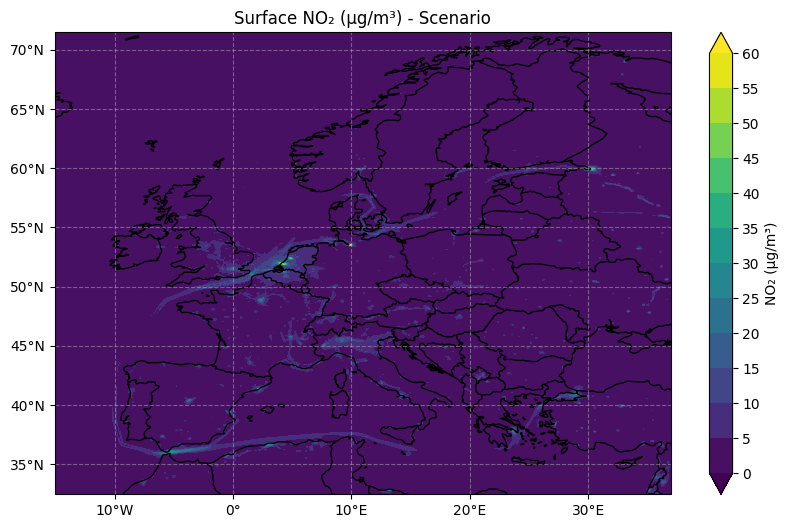

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load NetCDF file
scenario = xr.open_dataset("SCEN_PERT_NO2_YEARLY.nc")  # Removed extra `.nc`

# Select the variable and first (or only) time step
variable_name = "SURF_ug_NO2"
data = scenario[variable_name].isel(time=0)  # Select first time step

# Define levels for the colorbar (you can adjust the range and step as needed)
levels = np.arange(0, 65, 5)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={"projection": ccrs.PlateCarree()})

# Plot the data with discrete color levels
pcm = ax.contourf(data.lon, data.lat, data, levels=levels, cmap="viridis", extend="both", transform=ccrs.PlateCarree())

# Add country borders and coastlines
ax.add_feature(cfeature.BORDERS, linewidth=1, edgecolor="black")
ax.add_feature(cfeature.COASTLINE, linewidth=1, edgecolor="black")

# Define tick positions
xticks = [-10, 0, 10, 20, 30]  # Longitudes
yticks = [35, 40, 45, 50, 55, 60, 65, 70]  # Latitudes

ax.set_xticks(xticks, crs=ccrs.PlateCarree())
ax.set_yticks(yticks, crs=ccrs.PlateCarree())

# Format tick labels with degree symbols (°)
ax.set_xticklabels([f"{lon}°E" if lon > 0 else f"{abs(lon)}°W" if lon < 0 else "0°" for lon in xticks])
ax.set_yticklabels([f"{lat}°N" for lat in yticks])

# Remove labels from the top and right
ax.xaxis.set_tick_params(top=False, labeltop=False)  # Remove top labels
ax.yaxis.set_tick_params(right=False, labelright=False)  # Remove right labels

# Add grid lines
ax.gridlines(draw_labels=False, linestyle="--", alpha=0.5)

# Add colorbar with fixed range (0 to 60)
cbar = plt.colorbar(pcm, ax=ax, orientation="vertical", label="NO₂ (µg/m³)")
cbar.set_ticks(levels)  # Set ticks for colorbar

# Title
plt.title(f"Surface NO₂ (µg/m³) - Scenario")

# Show the plot
plt.show()

# Close dataset
scenario.close()


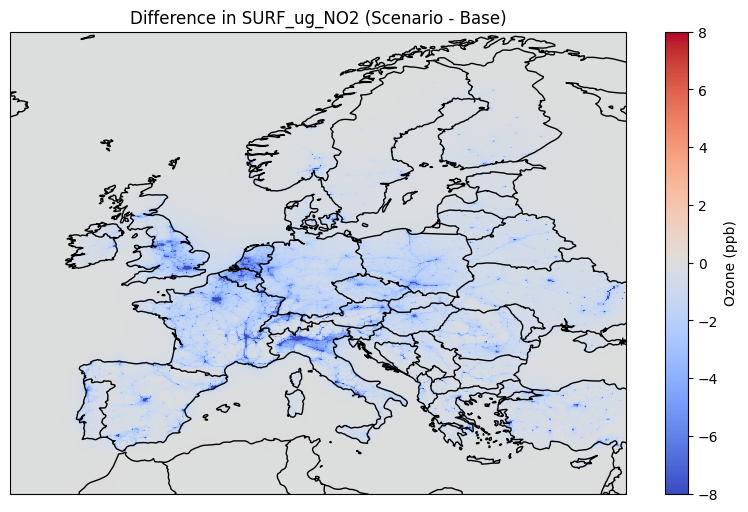

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors

# Load the NetCDF files
base_case = xr.open_dataset("BaseCase_PERT_NO2_YEARLY.nc")
scenario = xr.open_dataset("SCEN_PERT_NO2_YEARLY.nc")

# Select the variable to compare (adjust the variable name)
variable_name = "SURF_ug_NO2"
base_data = base_case[variable_name]
scenario_data = scenario[variable_name]

# Compute absolute difference
difference = scenario_data - base_data

# Function to plot data on a map using Cartopy
def plot_data_on_map(data, title, cmap="coolwarm", vmin=-8, vmax=8):
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={"projection": ccrs.PlateCarree()})

    # Define a custom normalization with fixed vmin and vmax
    norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

    # Plot the data with the custom colormap and normalization
    pcm = ax.pcolormesh(base_case["lon"].values, base_case["lat"].values, data.values, cmap=cmap,
                        norm=norm, shading="auto")

    # Add borders and coastlines
    ax.add_feature(cfeature.BORDERS, linewidth=1, edgecolor="black")
    ax.add_feature(cfeature.COASTLINE, linewidth=1, edgecolor="black")

    # Add colorbar
    cbar = plt.colorbar(pcm, ax=ax, orientation="vertical", label="Ozone (ppb)")

    # Title
    plt.title(title)

    # Show plot
    plt.show()

# Plot absolute difference
plot_data_on_map(difference.mean(dim="time"), f"Difference in {variable_name} (Scenario - Base)")

# Close files
base_case.close()
scenario.close()

# $PM2.5$

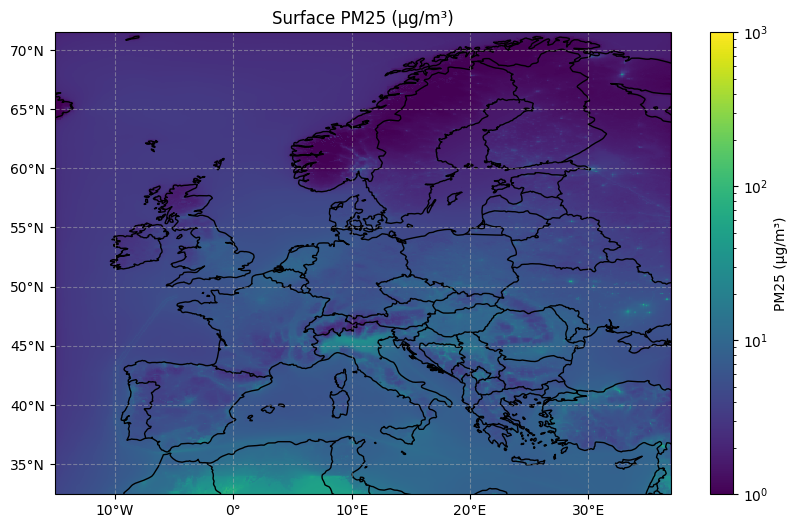

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load NetCDF file
BASE = xr.open_dataset("BaseCase_PERT_PM25_rh50_YEARLY.nc")  # Removed extra `.nc`

# Select the variable and first (or only) time step
variable_name = "SURF_ug_PM25_rh50"
data = BASE[variable_name].isel(time=0)  # Select first time step

# Mask zeros or set a small minimum value to avoid LogNorm issues
data = data.where(data > 0, 1e-10)  # Replace zeros with a small value to avoid log issues

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={"projection": ccrs.PlateCarree()})

# Apply logarithmic normalization (avoiding zero issues)
norm = mcolors.LogNorm(vmin=1, vmax=1000)  # Set vmin and vmax for the log scale

# Plot the data with log scaling
pcm = ax.pcolormesh(data.lon, data.lat, data, cmap="viridis", shading="auto",
                    norm=norm, transform=ccrs.PlateCarree())

# Add country borders and coastlines
ax.add_feature(cfeature.BORDERS, linewidth=1, edgecolor="black")
ax.add_feature(cfeature.COASTLINE, linewidth=1, edgecolor="black")

# Define tick positions
xticks = [-10, 0, 10, 20, 30]  # Longitudes
yticks = [35, 40, 45, 50, 55, 60, 65, 70]  # Latitudes

ax.set_xticks(xticks, crs=ccrs.PlateCarree())
ax.set_yticks(yticks, crs=ccrs.PlateCarree())

# Format tick labels with degree symbol (°)
ax.set_xticklabels([f"{lon}°E" if lon > 0 else f"{abs(lon)}°W" if lon < 0 else "0°" for lon in xticks])
ax.set_yticklabels([f"{lat}°N" for lat in yticks])

# Remove labels from the top and right
ax.xaxis.set_tick_params(top=False, labeltop=False)  # Remove top labels
ax.yaxis.set_tick_params(right=False, labelright=False)  # Remove right labels

# Add grid lines
ax.gridlines(draw_labels=False, linestyle="--", alpha=0.5)

# Add colorbar with logarithmic scale
cbar = plt.colorbar(pcm, ax=ax, orientation="vertical", label="PM25 (µg/m³)", norm=norm)
cbar.set_ticks([1, 10, 100, 1000])  # Logarithmic ticks
cbar.set_ticklabels([r"$10^0$", r"$10^1$", r"$10^2$", r"$10^3$"])  # Custom tick labels in log format

# Title
plt.title(f"Surface PM25 (µg/m³)")

# Show the plot
plt.show()

# Close dataset
base_case.close()

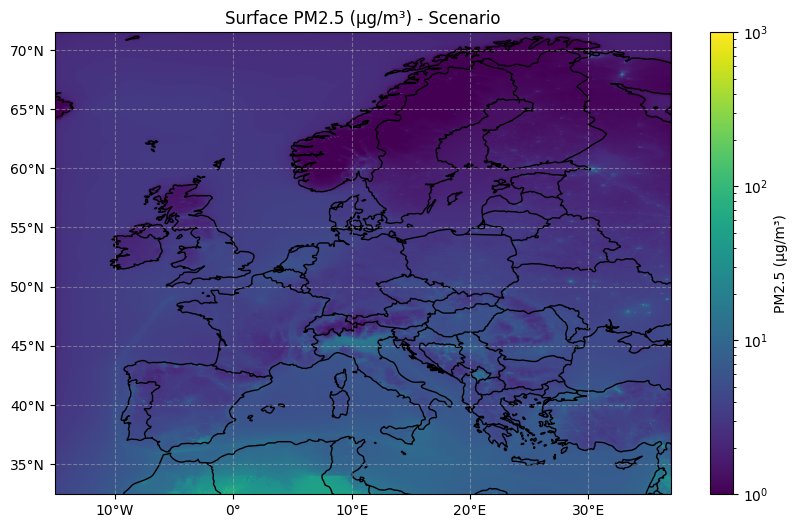

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load NetCDF file
scenario = xr.open_dataset("SCEN_PERT_PM25_rh50_YEARLY.nc")  # Removed extra `.nc`

# Select the variable and first (or only) time step
variable_name = "SURF_ug_PM25_rh50"
data = scenario[variable_name].isel(time=0)  # Select first time step

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={"projection": ccrs.PlateCarree()})

# Apply logarithmic normalization (avoiding zero issues)
norm = mcolors.LogNorm(vmin=1, vmax=1000)  # Set vmin and vmax for the log scale

# Plot the data with log scaling
pcm = ax.pcolormesh(data.lon, data.lat, data, cmap="viridis", shading="auto",
                    norm=norm, transform=ccrs.PlateCarree())

# Add country borders and coastlines
ax.add_feature(cfeature.BORDERS, linewidth=1, edgecolor="black")
ax.add_feature(cfeature.COASTLINE, linewidth=1, edgecolor="black")

# Define tick positions
xticks = [-10, 0, 10, 20, 30]  # Longitudes
yticks = [35, 40, 45, 50, 55, 60, 65, 70]  # Latitudes

ax.set_xticks(xticks, crs=ccrs.PlateCarree())
ax.set_yticks(yticks, crs=ccrs.PlateCarree())

# Format tick labels with degree symbols (°)
ax.set_xticklabels([f"{lon}°E" if lon > 0 else f"{abs(lon)}°W" if lon < 0 else "0°" for lon in xticks])
ax.set_yticklabels([f"{lat}°N" for lat in yticks])

# Remove labels from the top and right
ax.xaxis.set_tick_params(top=False, labeltop=False)  # Remove top labels
ax.yaxis.set_tick_params(right=False, labelright=False)  # Remove right labels

# Add grid lines
ax.gridlines(draw_labels=False, linestyle="--", alpha=0.5)

# Add colorbar with logarithmic scale
cbar = plt.colorbar(pcm, ax=ax, orientation="vertical", label="PM2.5 (µg/m³)", norm=norm)
cbar.set_ticks([1, 10, 100, 1000])  # Logarithmic ticks
cbar.set_ticklabels([r"$10^0$", r"$10^1$", r"$10^2$", r"$10^3$"])  # Custom tick labels in log format

# Title
plt.title(f"Surface PM2.5 (µg/m³) - Scenario")

# Show the plot
plt.show()

# Close dataset
scenario.close()

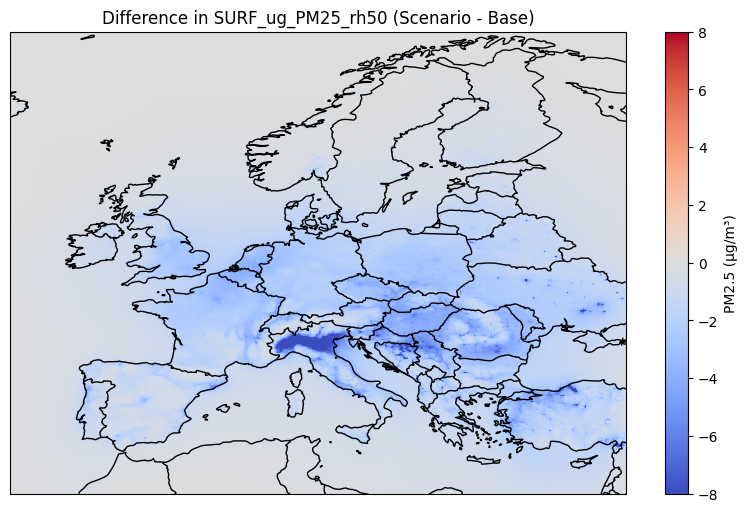

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors

# Load the NetCDF files
base_case = xr.open_dataset("BaseCase_PERT_PM25_rh50_YEARLY.nc")
scenario = xr.open_dataset("SCEN_PERT_PM25_rh50_YEARLY.nc")

# Select the variable to compare (adjust the variable name)
variable_name = "SURF_ug_PM25_rh50"
base_data = base_case[variable_name]
scenario_data = scenario[variable_name]

# Compute absolute difference
difference = scenario_data - base_data

# Function to plot data on a map using Cartopy
def plot_data_on_map(data, title, cmap="coolwarm", vmin=-8, vmax=8):
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={"projection": ccrs.PlateCarree()})

    # Define a custom normalization with fixed vmin and vmax
    norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

    # Plot the data with the custom colormap and normalization
    pcm = ax.pcolormesh(base_case["lon"].values, base_case["lat"].values, data.values, cmap=cmap,
                        norm=norm, shading="auto")

    # Add borders and coastlines
    ax.add_feature(cfeature.BORDERS, linewidth=1, edgecolor="black")
    ax.add_feature(cfeature.COASTLINE, linewidth=1, edgecolor="black")

    # Add colorbar
    cbar = plt.colorbar(pcm, ax=ax, orientation="vertical", label="PM2.5 (µg/m³)")

    # Title
    plt.title(title)

    # Show plot
    plt.show()

# Plot absolute difference
plot_data_on_map(difference.mean(dim="time"), f"Difference in {variable_name} (Scenario - Base)")

# Close files
base_case.close()
scenario.close()

# $O_{3}$

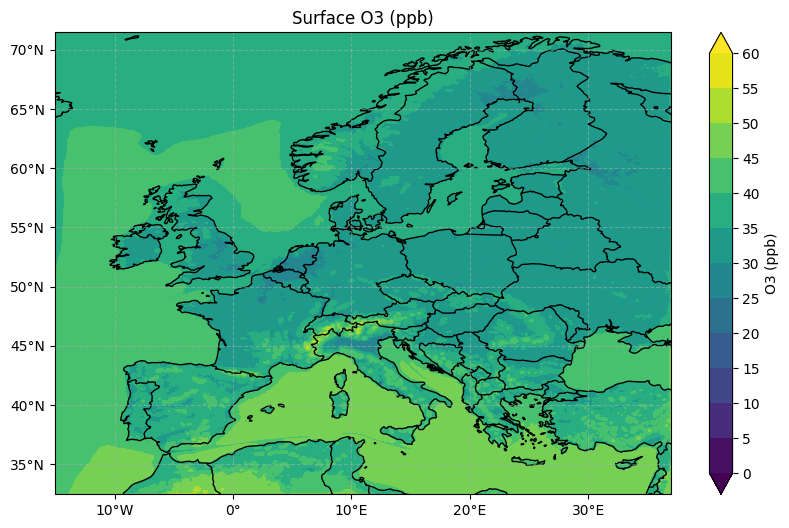

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load NetCDF file
BASE = xr.open_dataset("BaseCase_PERT_O3_YEARLY.nc")  # Removed extra `.nc`


# Select the variable and first (or only) time step
variable_name = "SURF_ppb_O3"
data = BASE[variable_name].isel(time=0)  # Select first time step
# Define levels for the colorbar (you can adjust the range and step as needed)
levels = np.arange(0, 65, 5)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={"projection": ccrs.PlateCarree()})

# Plot the data with discrete color levels
pcm = ax.contourf(data.lon, data.lat, data, levels=levels, cmap="viridis", extend="both", transform=ccrs.PlateCarree())

# Add country borders and coastlines
ax.add_feature(cfeature.BORDERS, linewidth=1, edgecolor="black")
ax.add_feature(cfeature.COASTLINE, linewidth=1, edgecolor="black")

# Define tick positions
xticks = [-10, 0, 10, 20, 30]  # Longitudes
yticks = [35, 40, 45, 50, 55, 60, 65, 70]  # Latitudes

ax.set_xticks(xticks, crs=ccrs.PlateCarree())
ax.set_yticks(yticks, crs=ccrs.PlateCarree())

# Format tick labels with degree symbols (°)
ax.set_xticklabels([f"{lon}°E" if lon > 0 else f"{abs(lon)}°W" if lon < 0 else "0°" for lon in xticks])
ax.set_yticklabels([f"{lat}°N" for lat in yticks])

# Remove labels from the top and right
ax.xaxis.set_tick_params(top=False, labeltop=False)  # Remove top labels
ax.yaxis.set_tick_params(right=False, labelright=False)  # Remove right labels

# Add grid lines
ax.gridlines(draw_labels=False, linestyle="--", alpha=0.5)

# Add colorbar with fixed range (0 to 60)
cbar = plt.colorbar(pcm, ax=ax, orientation="vertical", label="O3 (ppb)")
cbar.set_ticks(levels)  # Set ticks for colorbar

# Title
plt.title(f"Surface O3 (ppb)")

# Show the plot
plt.show()

# Close dataset
BASE.close()

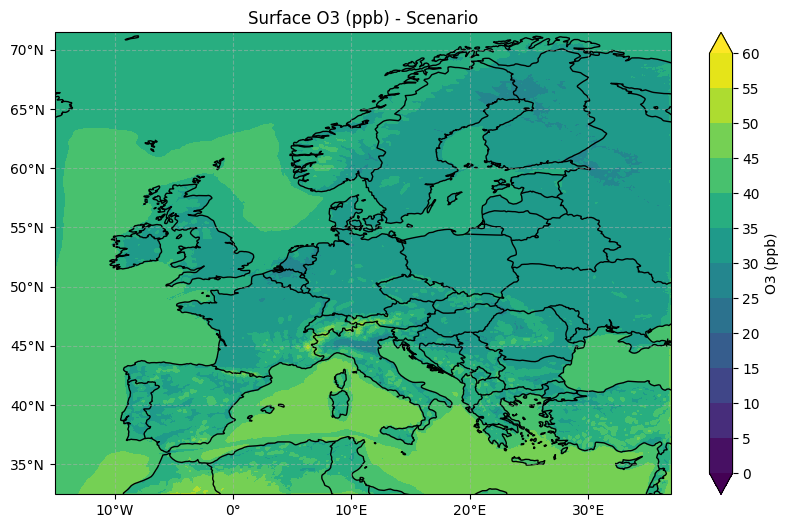

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load NetCDF file
scenario = xr.open_dataset("SCEN_PERT_O3_YEARLY.nc")  # Removed extra `.nc`

# Select the variable and first (or only) time step
variable_name = "SURF_ppb_O3"
data = scenario[variable_name].isel(time=0)  # Select first time step

# Define levels for the colorbar (you can adjust the range and step as needed)
levels = np.arange(0, 65, 5)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={"projection": ccrs.PlateCarree()})

# Plot the data with discrete color levels
pcm = ax.contourf(data.lon, data.lat, data, levels=levels, cmap="viridis", extend="both", transform=ccrs.PlateCarree())

# Add country borders and coastlines
ax.add_feature(cfeature.BORDERS, linewidth=1, edgecolor="black")
ax.add_feature(cfeature.COASTLINE, linewidth=1, edgecolor="black")

# Define tick positions
xticks = [-10, 0, 10, 20, 30]  # Longitudes
yticks = [35, 40, 45, 50, 55, 60, 65, 70]  # Latitudes

ax.set_xticks(xticks, crs=ccrs.PlateCarree())
ax.set_yticks(yticks, crs=ccrs.PlateCarree())

# Format tick labels with degree symbols (°)
ax.set_xticklabels([f"{lon}°E" if lon > 0 else f"{abs(lon)}°W" if lon < 0 else "0°" for lon in xticks])
ax.set_yticklabels([f"{lat}°N" for lat in yticks])

# Remove labels from the top and right
ax.xaxis.set_tick_params(top=False, labeltop=False)  # Remove top labels
ax.yaxis.set_tick_params(right=False, labelright=False)  # Remove right labels

# Add grid lines
ax.gridlines(draw_labels=False, linestyle="--", alpha=0.5)

# Add colorbar with fixed range (0 to 60)
cbar = plt.colorbar(pcm, ax=ax, orientation="vertical", label="O3 (ppb)")
cbar.set_ticks(levels)  # Set ticks for colorbar

# Title
plt.title(f"Surface O3 (ppb) - Scenario")

# Show the plot
plt.show()

# Close dataset
scenario.close()


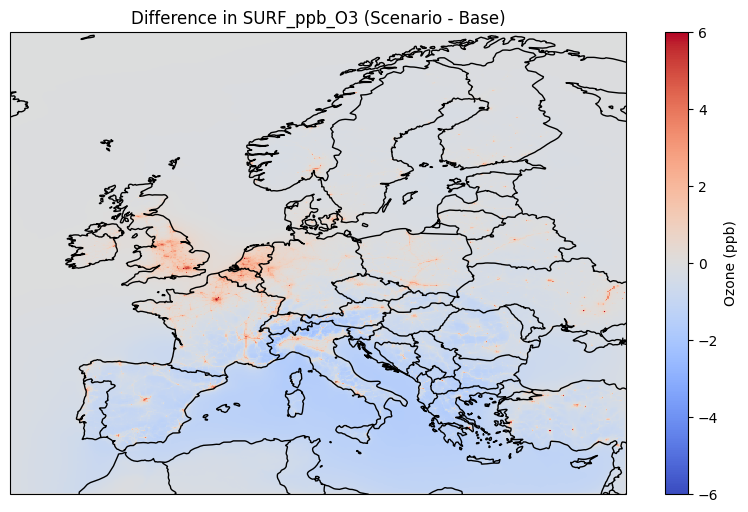

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors

# Load NetCDF file
base_case = xr.open_dataset("BaseCase_PERT_O3_YEARLY.nc")
scenario = xr.open_dataset("SCEN_PERT_O3_YEARLY.nc")

# Select the variable to compare (adjust the variable name)
variable_name = "SURF_ppb_O3"
base_data = base_case[variable_name]
scenario_data = scenario[variable_name]

# Compute absolute difference
difference = scenario_data - base_data

# Function to plot data on a map using Cartopy
def plot_data_on_map(data, title, cmap="coolwarm", vmin=-6, vmax=6):
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={"projection": ccrs.PlateCarree()})

    # Define a custom normalization with fixed vmin and vmax
    norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

    # Plot the data with the custom colormap and normalization
    pcm = ax.pcolormesh(base_case["lon"].values, base_case["lat"].values, data.values, cmap=cmap,
                        norm=norm, shading="auto")

    # Add borders and coastlines
    ax.add_feature(cfeature.BORDERS, linewidth=1, edgecolor="black")
    ax.add_feature(cfeature.COASTLINE, linewidth=1, edgecolor="black")

    # Add colorbar
    cbar = plt.colorbar(pcm, ax=ax, orientation="vertical", label="Ozone (ppb)")

    # Title
    plt.title(title)

    # Show plot
    plt.show()

# Plot absolute difference
plot_data_on_map(difference.mean(dim="time"), f"Difference in {variable_name} (Scenario - Base)")

# Close files
base_case.close()
scenario.close()